In [10]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 install pandas

  Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp311-cp311-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl (66 kB)
Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statistics
df = pd.read_csv('./Trabalho Arthur - Página1.csv')
df['Preço Atual'] = df['Preço Atual'].str.replace(',', '.')
df['Preço Atual'] = df['Preço Atual'].str.replace('R$ ', '')
df['Preço Atual'] = df['Preço Atual'].astype(float)

df['Preço Original'] = df['Preço Original'].str.replace(',', '.')
df['Preço Original'] = df['Preço Original'].str.replace('R$ ', '')
df['Preço Original'] = df['Preço Original'].astype(float)
df.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
media_geral = df['Preço Atual'].mean()
desvio_padrao_geral = df['Preço Atual'].std()

SalonLine = df['Preço Atual'][2:31]
Pantene = df['Preço Atual'][31:60]
Seda = df['Preço Atual'][62:]

data = {
    'medidas': ['Creme de Pentear Hidratação Intensa Salon Line','Pantene creme de pentear hidrata 240g ', 'Seda Creme De Pentear 300Ml Cachos Definidos'],
    'Media':[SalonLine.mean(),Pantene.mean(),Seda.mean()],
    'Mediana':[statistics.median(SalonLine), statistics.median(Pantene),statistics.median(Seda)],
    'Minimo':[min(SalonLine),min(Pantene),min(Seda)],
    'Maximo':[max(SalonLine),max(Pantene),max(Seda)],
    'Amplitude':[max(SalonLine)-min(SalonLine), max(Pantene)-min(Pantene), max(Seda)-min(Seda)],
    'Desviu Padrão':[SalonLine.std(), Pantene.std(), Seda.std()]

}
df_medidas = pd.DataFrame(data)

df_medidas = df_medidas.transpose()

display(df_medidas)
print("Média geral: %.2f" % media_geral)
print("Desvio padrão geral: " + str(desvio_padrao_geral))


,0,1,2
medidas,Creme de Pentear Hidratação Intensa Salon Line,Pantene creme de pentear hidrata 240g,Seda Creme De Pentear 300Ml Cachos Definidos
Media,39.182069,23.187586,10.307143
Mediana,39.34,20.99,10.465
Minimo,14.79,14.64,6.2
Maximo,59.39,55.9,14.9
Amplitude,44.6,41.26,8.7
Desviu Padrão,8.056611,10.017295,1.432545


Média geral: 24.22
Desvio padrão geral: 13.911132975935399


<Axes: xlabel='Nome do Produto'>

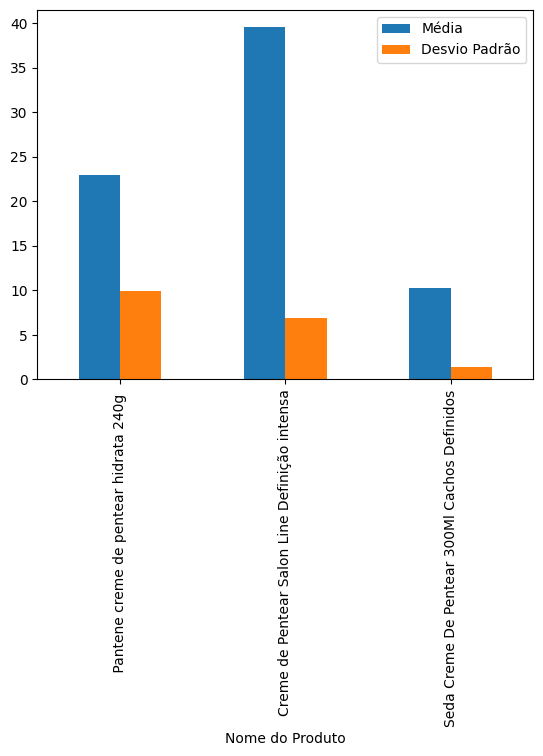

In [15]:
grouped = df.groupby('Nome do Produto')['Preço Atual']
result = grouped.agg(['mean', 'std'])
result.columns = ['Média', 'Desvio Padrão']
result.plot.bar()
